<a href="https://colab.research.google.com/github/tahsin4466/SMV-HS-Code/blob/main/Copy_of_EE149_PSET_4_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## uncomment these if you upload this on google drive and mount the drive
# from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# drive.mount('/content/gdrive', force_remount=True)

#### Q1. Loading Data

Run the below cell to load CIFAR-10 train and test data.
Answer the corresponding questions in the overleaf document

In [2]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

\
## creating data loaders
batch_size = 4 ## set the batch size value
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Print the number of samples in training and test datasets
print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")

100%|██████████| 170M/170M [00:06<00:00, 27.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Number of training samples: 50000
Number of test samples: 10000


### Helper function
To display images in the training set

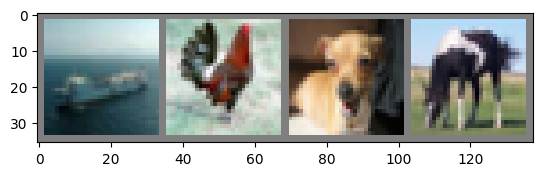

 ship  bird   dog horse


In [3]:
# function to display images in the training set
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


### Q2. Classifier Architecture

In [4]:
## Defining Classifier architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Q3. Training the network

(i) Training on CPU

[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.095
[1, 2000] loss: 2.037
[1, 2250] loss: 1.985
[1, 2500] loss: 1.949
[1, 2750] loss: 1.951
[1, 3000] loss: 1.864
[1, 3250] loss: 1.843
[1, 3500] loss: 1.789
[1, 3750] loss: 1.754
[1, 4000] loss: 1.763
[1, 4250] loss: 1.711
[1, 4500] loss: 1.716
[1, 4750] loss: 1.691
[1, 5000] loss: 1.684
[1, 5250] loss: 1.630
[1, 5500] loss: 1.669
[1, 5750] loss: 1.700
[1, 6000] loss: 1.652
[1, 6250] loss: 1.569
[1, 6500] loss: 1.604
[1, 6750] loss: 1.556
[1, 7000] loss: 1.555
[1, 7250] loss: 1.520
[1, 7500] loss: 1.531
[1, 7750] loss: 1.537
[1, 8000] loss: 1.507
[1, 8250] loss: 1.538
[1, 8500] loss: 1.491
[1, 8750] loss: 1.489
[1, 9000] loss: 1.537
[1, 9250] loss: 1.509
[1, 9500] loss: 1.471
[1, 9750] loss: 1.477
[1, 10000] loss: 1.410
[1, 10250] loss: 1.481
[1, 10500] loss: 1.453
[1, 10750] loss: 1.427
[1, 11000] loss: 1.422
[1, 11250] loss: 1.459
[1, 115

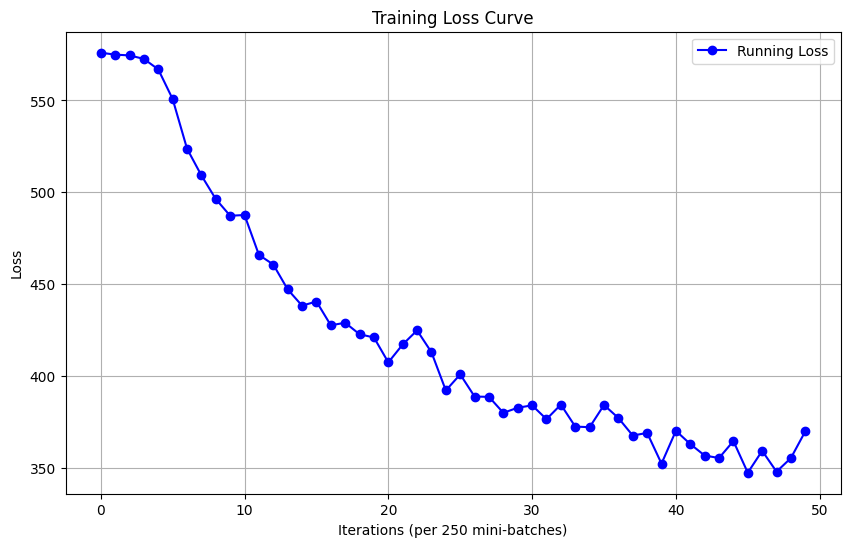

In [5]:

### Complete the code in the training box

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net().cuda()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 1 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs.cuda())
        loss = criterion(outputs, labels.cuda())

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0

print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

## complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list):
    plt.figure(figsize=(10, 6))
    plt.plot(running_loss_list, marker='o', linestyle='-', color='b', label='Running Loss')
    plt.xlabel('Iterations (per 250 mini-batches)')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_loss_curve(running_loss_list)





(ii) Paste the above code in the code block below and modify it to use GPUs for training


[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.202
[1, 1750] loss: 2.095
[1, 2000] loss: 2.037
[1, 2250] loss: 1.983
[1, 2500] loss: 1.949
[1, 2750] loss: 1.951
[1, 3000] loss: 1.861
[1, 3250] loss: 1.842
[1, 3500] loss: 1.791
[1, 3750] loss: 1.753
[1, 4000] loss: 1.762
[1, 4250] loss: 1.712
[1, 4500] loss: 1.720
[1, 4750] loss: 1.690
[1, 5000] loss: 1.684
[1, 5250] loss: 1.638
[1, 5500] loss: 1.668
[1, 5750] loss: 1.696
[1, 6000] loss: 1.646
[1, 6250] loss: 1.571
[1, 6500] loss: 1.604
[1, 6750] loss: 1.551
[1, 7000] loss: 1.560
[1, 7250] loss: 1.526
[1, 7500] loss: 1.526
[1, 7750] loss: 1.532
[1, 8000] loss: 1.505
[1, 8250] loss: 1.540
[1, 8500] loss: 1.487
[1, 8750] loss: 1.493
[1, 9000] loss: 1.528
[1, 9250] loss: 1.512
[1, 9500] loss: 1.481
[1, 9750] loss: 1.482
[1, 10000] loss: 1.408
[1, 10250] loss: 1.472
[1, 10500] loss: 1.448
[1, 10750] loss: 1.427
[1, 11000] loss: 1.425
[1, 11250] loss: 1.465
[1, 115

[20, 12500] loss: 0.711
Training Complete


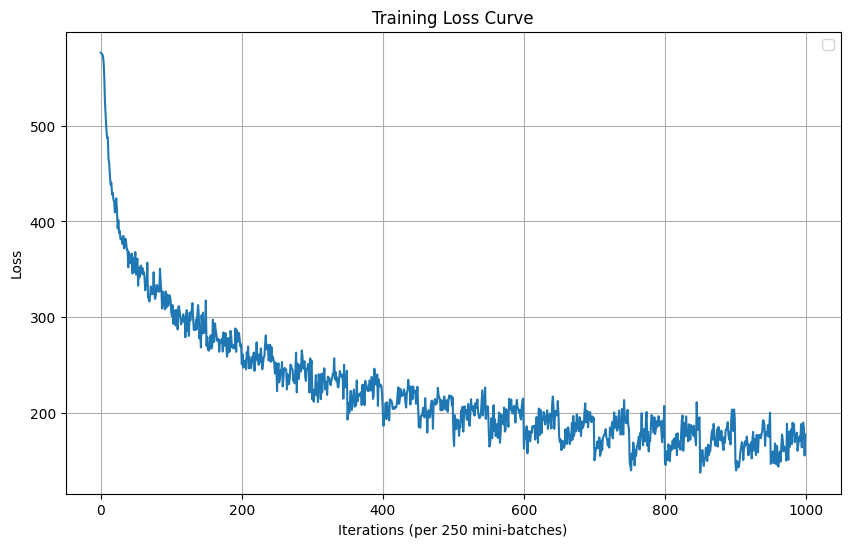

In [ ]:
### Copy the code from (i), and modify it to run on GPUs for 20 epochs

### Complete the code in the training box

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net().cuda()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 20 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        # Fill in the training loop here.
        #===============================================#
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs.cuda())
        loss = criterion(outputs, labels.cuda())

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()
        # print statistics

        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0

print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

## complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list):
    plt.figure(figsize=(10, 6))
    plt.plot(running_loss_list)
    plt.xlabel('Iterations (per 250 mini-batches)')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_loss_curve(running_loss_list)




### Testing the network

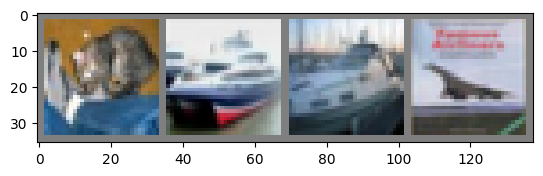

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car truck plane


<ipython-input-6-9e786c2a8a27>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


In [6]:
## displaying images from test set
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
display(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % class_labels[labels[j]] for j in range(4)))

## Instantiating network and loading the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting predicted label/class from the model output
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_labels[predicted[j]] for j in range(4)))

(iv) Complete the code below to test the network on the entire testing set.

In [8]:

### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc  = 100 * correct / total## stores the accuracy computed in the above loop
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 49 %


(v) Convert the training code in part (iii) and testing code in part (iv) to define functions `train` and  `test` with function definitions as shown below. Train the network with different batch size and number of epochs. Use the `plot_loss_curve` function you defined in (i) above to plot the loss curves. Use the defined `train` and `test` functions to train the network for various configurations asked in (v) in the problem set.

Files already downloaded and verified
Files already downloaded and verified
[1, 500] loss: 2.304
[1, 1000] loss: 2.299
[1, 1500] loss: 2.258
[1, 2000] loss: 2.119
[1, 2500] loss: 2.037
[1, 3000] loss: 1.967
[1, 3500] loss: 1.885
[1, 4000] loss: 1.810
[1, 4500] loss: 1.740
[1, 5000] loss: 1.719
[1, 5500] loss: 1.673
[1, 6000] loss: 1.684
[1, 6500] loss: 1.638
[1, 7000] loss: 1.616
[1, 7500] loss: 1.593
[1, 8000] loss: 1.570
[1, 8500] loss: 1.536
[1, 9000] loss: 1.554
[1, 9500] loss: 1.548
[1, 10000] loss: 1.497
[1, 10500] loss: 1.516
[1, 11000] loss: 1.503
[1, 11500] loss: 1.487
[1, 12000] loss: 1.456
[1, 12500] loss: 1.461
[2, 500] loss: 1.407
[2, 1000] loss: 1.394
[2, 1500] loss: 1.395
[2, 2000] loss: 1.418
[2, 2500] loss: 1.397
[2, 3000] loss: 1.410
[2, 3500] loss: 1.362
[2, 4000] loss: 1.379
[2, 4500] loss: 1.372
[2, 5000] loss: 1.326
[2, 5500] loss: 1.364
[2, 6000] loss: 1.341
[2, 6500] loss: 1.341
[2, 7000] loss: 1.365
[2, 7500] loss: 1.336
[2, 8000] loss: 1.344
[2, 8500] loss: 1.

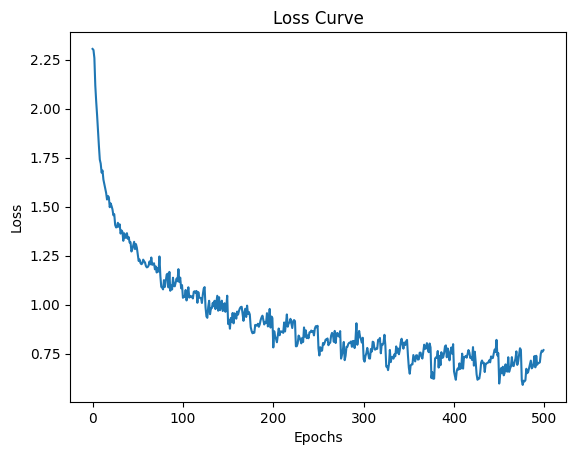

<ipython-input-13-bce404709a1e>:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(model_path))


Accuracy of the network on the 10000 test images: 58 %
[1, 500] loss: 2.292
[1, 1000] loss: 2.203
[1, 1500] loss: 2.131
[1, 2000] loss: 2.078
[1, 2500] loss: 2.041
[1, 3000] loss: 1.994
[1, 3500] loss: 1.953
[1, 4000] loss: 1.878
[1, 4500] loss: 1.792
[1, 5000] loss: 1.763
[1, 5500] loss: 1.694
[1, 6000] loss: 1.717
[1, 6500] loss: 1.658
[1, 7000] loss: 1.637
[1, 7500] loss: 1.629
[1, 8000] loss: 1.629
[1, 8500] loss: 1.550
[1, 9000] loss: 1.552
[1, 9500] loss: 1.592
[1, 10000] loss: 1.553
[1, 10500] loss: 1.540
[1, 11000] loss: 1.500
[1, 11500] loss: 1.526
[1, 12000] loss: 1.468
[1, 12500] loss: 1.465
[2, 500] loss: 1.469
[2, 1000] loss: 1.426
[2, 1500] loss: 1.457
[2, 2000] loss: 1.406
[2, 2500] loss: 1.375
[2, 3000] loss: 1.397
[2, 3500] loss: 1.412
[2, 4000] loss: 1.382
[2, 4500] loss: 1.401
[2, 5000] loss: 1.373
[2, 5500] loss: 1.394
[2, 6000] loss: 1.339
[2, 6500] loss: 1.385
[2, 7000] loss: 1.364
[2, 7500] loss: 1.342
[2, 8000] loss: 1.334
[2, 8500] loss: 1.336
[2, 9000] loss: 1

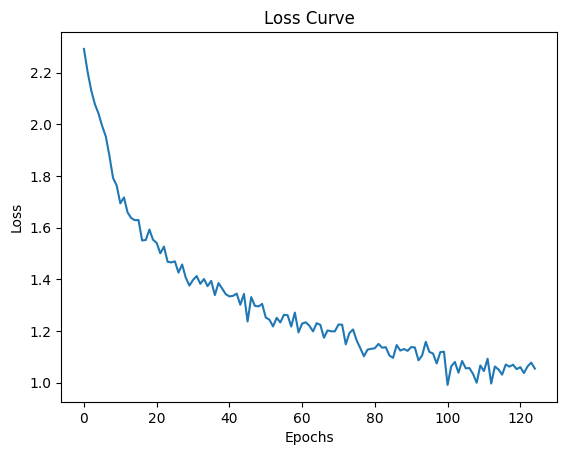

Accuracy of the network on the 10000 test images: 59 %


TypeError: train() got an unexpected keyword argument 'batch_size'

In [13]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch
import matplotlib.pyplot as plt

# Assuming you have defined your dataset (train_data and test_data)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

def get_data_loader(batch_size, train=True):
    dataset = train_data if train else test_data
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)


def train(train_loader, net, criterion, optimizer, num_epochs=5, use_gpu=False, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
    """
    The `batch_size` parameter is removed from this function since the batch size is already defined by the DataLoader.
    """
    if use_gpu and torch.cuda.is_available():
        net = net.cuda()

    running_loss_list = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            if use_gpu and torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 500 == 499:  # Print every 2000 mini-batches
                print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 500))
                running_loss_list.append(running_loss / 500)
                running_loss = 0.0

    torch.save(net.state_dict(), model_save_path)

    return running_loss_list

def test(test_loader, net, model_path='./net.pth', use_gpu=False):
    net.load_state_dict(torch.load(model_path))
    if use_gpu and torch.cuda.is_available():
        net = net.cuda()

    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            if use_gpu and torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

def plot_loss_curve(running_loss_list):
    plt.plot(running_loss_list)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.show()

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

batch_size_4_loader = get_data_loader(batch_size=4, train=True)
batch_size_16_loader = get_data_loader(batch_size=16, train=True)
test_loader = get_data_loader(batch_size=4, train=False)


#training Batch Size 4, 20 training epochs
running_loss_list = train(batch_size_4_loader, net, criterion, optimizer, num_epochs=20, use_gpu=True, model_save_path='./net.pth')
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)


#Training Batch Size 4, 5 epochs

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

batch_size_4_loader = get_data_loader(batch_size=4, train=True)
batch_size_16_loader = get_data_loader(batch_size=16, train=True)
test_loader = get_data_loader(batch_size=4, train=False)

running_loss_list = train(batch_size_4_loader, net, criterion, optimizer, num_epochs=5, use_gpu=True, model_save_path='./net.pth')
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

batch_size_4_loader = get_data_loader(batch_size=4, train=True)
batch_size_16_loader = get_data_loader(batch_size=16, train=True)
test_loader = get_data_loader(batch_size=4, train=False)

#Training Batch Size 16, 5 epochs
running_loss_list = train(batch_size_16_loader, net, criterion, optimizer, num_epochs=5, use_gpu=True, model_save_path='./net.pth')
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

batch_size_4_loader = get_data_loader(batch_size=4, train=True)
batch_size_16_loader = get_data_loader(batch_size=16, train=True)
test_loader = get_data_loader(batch_size=4, train=False)

#Training Batch Size 16, 20 epoch
running_loss_list = train(batch_size_16_loader, net, criterion, optimizer, num_epochs=20, use_gpu=True, model_save_path='./net.pth')
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)

Files already downloaded and verified
Files already downloaded and verified
[1, 500] loss: 2.303
[1, 1000] loss: 2.297
[1, 1500] loss: 2.270
[1, 2000] loss: 2.105
[1, 2500] loss: 1.969
[1, 3000] loss: 1.883
[2, 500] loss: 1.753
[2, 1000] loss: 1.689
[2, 1500] loss: 1.624
[2, 2000] loss: 1.582
[2, 2500] loss: 1.542
[2, 3000] loss: 1.523
[3, 500] loss: 1.448
[3, 1000] loss: 1.456
[3, 1500] loss: 1.422
[3, 2000] loss: 1.426
[3, 2500] loss: 1.400
[3, 3000] loss: 1.405
[4, 500] loss: 1.362
[4, 1000] loss: 1.333
[4, 1500] loss: 1.320
[4, 2000] loss: 1.313
[4, 2500] loss: 1.299
[4, 3000] loss: 1.286
[5, 500] loss: 1.237
[5, 1000] loss: 1.219
[5, 1500] loss: 1.235
[5, 2000] loss: 1.240
[5, 2500] loss: 1.243
[5, 3000] loss: 1.206


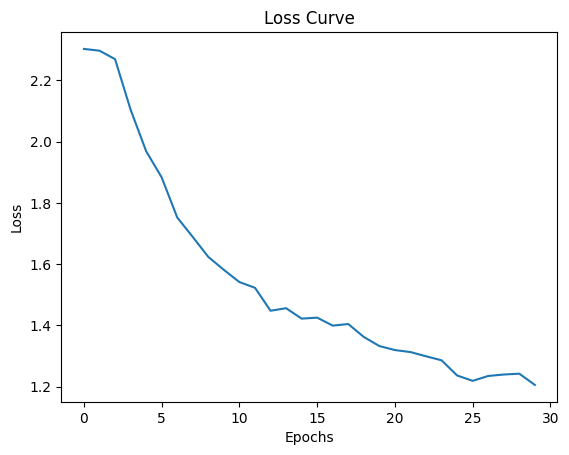

<ipython-input-16-d8b6dad25824>:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(model_path))


Accuracy of the network on the 10000 test images: 55 %
[1, 500] loss: 2.299
[1, 1000] loss: 2.254
[1, 1500] loss: 2.124
[1, 2000] loss: 1.996
[1, 2500] loss: 1.884
[1, 3000] loss: 1.760
[2, 500] loss: 1.675
[2, 1000] loss: 1.633
[2, 1500] loss: 1.587
[2, 2000] loss: 1.538
[2, 2500] loss: 1.520
[2, 3000] loss: 1.507
[3, 500] loss: 1.476
[3, 1000] loss: 1.446
[3, 1500] loss: 1.390
[3, 2000] loss: 1.392
[3, 2500] loss: 1.373
[3, 3000] loss: 1.366
[4, 500] loss: 1.314
[4, 1000] loss: 1.319
[4, 1500] loss: 1.298
[4, 2000] loss: 1.308
[4, 2500] loss: 1.267
[4, 3000] loss: 1.275
[5, 500] loss: 1.236
[5, 1000] loss: 1.253
[5, 1500] loss: 1.217
[5, 2000] loss: 1.214
[5, 2500] loss: 1.196
[5, 3000] loss: 1.200
[6, 500] loss: 1.165
[6, 1000] loss: 1.155
[6, 1500] loss: 1.173
[6, 2000] loss: 1.150
[6, 2500] loss: 1.152
[6, 3000] loss: 1.139
[7, 500] loss: 1.093
[7, 1000] loss: 1.115
[7, 1500] loss: 1.094
[7, 2000] loss: 1.110
[7, 2500] loss: 1.118
[7, 3000] loss: 1.077
[8, 500] loss: 1.052
[8, 100

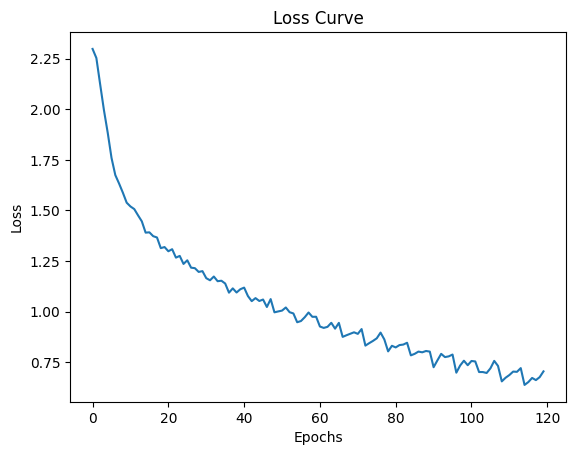

Accuracy of the network on the 10000 test images: 63 %


In [16]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch
import matplotlib.pyplot as plt

# Assuming you have defined your dataset (train_data and test_data)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

def get_data_loader(batch_size, train=True):
    dataset = train_data if train else test_data
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)


def train(train_loader, net, criterion, optimizer, num_epochs=5, use_gpu=False, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
    """
    The `batch_size` parameter is removed from this function since the batch size is already defined by the DataLoader.
    """
    if use_gpu and torch.cuda.is_available():
        net = net.cuda()

    running_loss_list = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            if use_gpu and torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 500 == 499:  # Print every 2000 mini-batches
                print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 500))
                running_loss_list.append(running_loss / 500)
                running_loss = 0.0

    torch.save(net.state_dict(), model_save_path)

    return running_loss_list

def test(test_loader, net, model_path='./net.pth', use_gpu=False):
    net.load_state_dict(torch.load(model_path))
    if use_gpu and torch.cuda.is_available():
        net = net.cuda()

    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            if use_gpu and torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

def plot_loss_curve(running_loss_list):
    plt.plot(running_loss_list)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.show()

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

batch_size_4_loader = get_data_loader(batch_size=4, train=True)
batch_size_16_loader = get_data_loader(batch_size=16, train=True)
test_loader = get_data_loader(batch_size=4, train=False)

#Training Batch Size 16, 5 epochs
running_loss_list = train(batch_size_16_loader, net, criterion, optimizer, num_epochs=5, use_gpu=True, model_save_path='./net.pth')
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

batch_size_4_loader = get_data_loader(batch_size=4, train=True)
batch_size_16_loader = get_data_loader(batch_size=16, train=True)
test_loader = get_data_loader(batch_size=4, train=False)

#Training Batch Size 16, 20 epoch
running_loss_list = train(batch_size_16_loader, net, criterion, optimizer, num_epochs=20, use_gpu=True, model_save_path='./net.pth')
plot_loss_curve(running_loss_list)
test(test_loader, net, model_path='./net.pth', use_gpu=True)